In [18]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('jordan.csv')

In [3]:
df.dtypes

Year                int64
Planted Area      float64
Harvested Area    float64
Temp_mean         float64
Temp_min          float64
Temp_max          float64
Precipitation     float64
Average Yield     float64
crop               object
Production        float64
dtype: object

In [4]:
# One-Hot Encode categorical features (if any)
categorical_features = [col for col in df if df[col].dtype == object]
for col in categorical_features:
    df = pd.get_dummies(df, columns=[col])

In [5]:
'''df['Planted Area']=df['Planted Area'].astype(int)
df['Harvested Area']=df['Harvested Area'].astype(int)
df['Production']=df['Production'].astype(int)'''

"df['Planted Area']=df['Planted Area'].astype(int)\ndf['Harvested Area']=df['Harvested Area'].astype(int)\ndf['Production']=df['Production'].astype(int)"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Planted Area    120 non-null    float64
 2   Harvested Area  120 non-null    float64
 3   Temp_mean       120 non-null    float64
 4   Temp_min        120 non-null    float64
 5   Temp_max        120 non-null    float64
 6   Precipitation   120 non-null    float64
 7   Average Yield   120 non-null    float64
 8   Production      120 non-null    float64
 9   crop_Barley     120 non-null    bool   
 10  crop_Chickpea   120 non-null    bool   
 11  crop_Lentil     120 non-null    bool   
 12  crop_Vetch      120 non-null    bool   
 13  crop_Wheat      120 non-null    bool   
dtypes: bool(5), float64(8), int64(1)
memory usage: 9.2 KB


In [7]:
corr_matrix = df.corr()

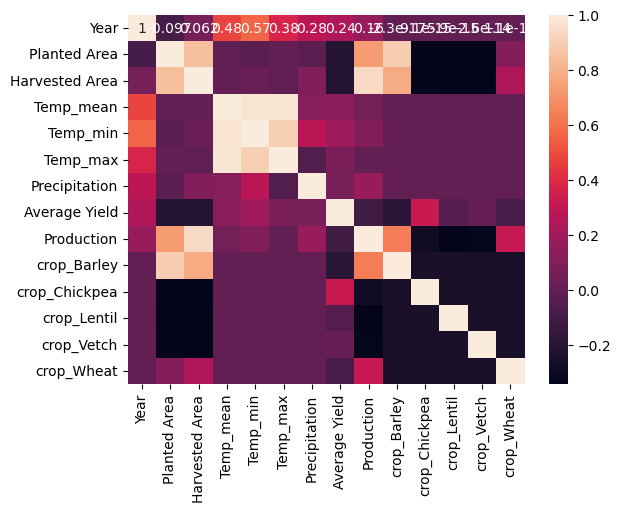

['Year', 'Planted Area', 'Harvested Area', 'Temp_mean', 'Temp_min', 'Temp_max', 'Precipitation', 'Average Yield', 'Production', 'crop_Barley', 'crop_Chickpea', 'crop_Lentil', 'crop_Vetch', 'crop_Wheat']


In [8]:
# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()
# Select features with correlation above a threshold
threshold = 0.8
corr_features = [col for col in corr_matrix.columns if any(abs(corr_matrix[col]) > threshold)]
print(corr_features)

In [9]:
correlations = df.corrwith(df['Production'])
print(correlations)

Year              0.162050
Planted Area      0.732012
Harvested Area    0.935576
Temp_mean         0.050504
Temp_min          0.093477
Temp_max          0.007114
Precipitation     0.169525
Average Yield    -0.117689
Production        1.000000
crop_Barley       0.634870
crop_Chickpea    -0.284775
crop_Lentil      -0.338342
crop_Vetch       -0.325990
crop_Wheat        0.314238
dtype: float64


In [10]:
X = df.drop(['Production'], axis=1)
y = df['Production']

## Transform

In [11]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

In [12]:
Y_log = np.log(y + 1)
print("Original target:", y)
print("Log-transformed target:", Y_log)

Original target: 0       9250.5
1      25433.7
2      19293.0
3      43770.8
4      42526.0
        ...   
115      371.6
116       38.4
117      819.1
118     1012.5
119      570.0
Name: Production, Length: 120, dtype: float64
Log-transformed target: 0       9.132541
1      10.143870
2       9.867549
3      10.686745
4      10.657894
         ...    
115     5.920505
116     3.673766
117     6.709426
118     6.921165
119     6.347389
Name: Production, Length: 120, dtype: float64


In [13]:
print(X_transformed.shape)
print(Y_log.shape)

(120, 13)
(120,)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_log, test_size=0.2, random_state=42)

In [24]:
# Create a polynomial features object
poly = PolynomialFeatures(degree=2) # Adjust degree as needed
# Create a pipeline
model = Pipeline([('poly', poly), ('linear', LinearRegression())])
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math
# After making predictions on the testing set (y_pred)
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
r2 = r2_score(y_test, predictions)
# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print("RMSE:", math.sqrt(mse))

Mean Absolute Error (MAE): 0.23869974630497015
Mean Squared Error (MSE): 0.0879969915152723
R-squared: 0.9815564506159348
RMSE: 0.2966428686405124


In [29]:
print(X.shape)
print(y.shape)

(120, 13)
(120,)


In [32]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
  """Calculates the Root Mean Squared Error (RMSE)"""
  return np.sqrt(mean_squared_error(y_test, predictions))

rmse_val = rmse(y_test, predictions)
print("RMSE:", rmse_val)

RMSE: 0.2966428686405124


Mean Absolute Percentage Error: 3.3392201004870605


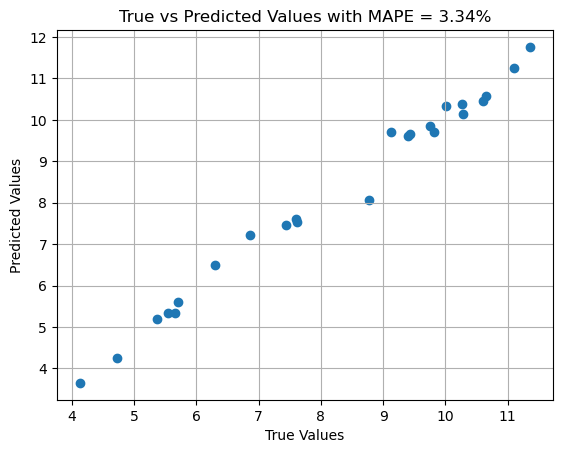

In [35]:
import numpy as np
import matplotlib.pyplot as plt
def mean_absolute_percentage_error(y_test, predictions):
  """Calculates the Mean Absolute Percentage Error (MAPE)"""
  y_test, predictions = np.array(y_test), np.array(predictions)
  return np.mean(np.abs((y_test - predictions) / y_test)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Absolute Percentage Error:", mape)

# Create scatter plot
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values with MAPE = {mape:.2f}%")
plt.grid(True)
plt.show()

In [37]:
# Create a DataFrame
dfp = pd.DataFrame({'True Values': y_test, 'Predicted Values': predictions})
# Calculate the difference
dfp['Difference'] = abs(dfp['True Values'] - dfp['Predicted Values'])
# Sort by difference
df_sorted = dfp.sort_values(by='Difference', ascending=False)
print(df_sorted)

     True Values  Predicted Values  Difference
91      8.766706          8.060791    0.705915
0       9.132541          9.698486    0.565945
65      4.730039          4.250732    0.479307
64      4.122284          3.649658    0.472626
45     11.369238         11.761475    0.392237
70      6.867662          7.231689    0.364027
11     10.004536         10.341064    0.336529
104     5.650733          5.332275    0.318458
10      9.432283          9.667480    0.235197
109     5.547908          5.327881    0.220027
107     6.293789          6.500977    0.207188
18      9.401902          9.605713    0.203810
62      5.368776          5.202881    0.165895
40     10.608731         10.461670    0.147061
44     11.106747         11.241943    0.135197
36     10.284879         10.152100    0.132779
31      9.822202          9.697021    0.125180
47     10.267436         10.389404    0.121968
55      5.711420          5.593018    0.118402
26      9.760166          9.851318    0.091153
4      10.657